<a href="https://colab.research.google.com/github/balnarendrasapa/mask-detection/blob/master/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# get kaggle.json and upload it to runtime. upload kaggle.json before running this cell
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 98% 324M/330M [00:03<00:00, 96.5MB/s]
100% 330M/330M [00:03<00:00, 106MB/s] 


In [ ]:
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [120]:
root_dir = "Face Mask Dataset/"

In [121]:
from torchvision.transforms import transforms

transform=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])
])

In [122]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder

In [123]:
train_dataset = ImageFolder(root_dir+"Train", transform = transform)
test_dataset = ImageFolder(root_dir+"Test", transform = transform)
validation_dataset = ImageFolder(root_dir+"Validation", transform = transform)

In [124]:
num_classes = len(train_dataset.classes)
print(train_dataset.classes)

['WithMask', 'WithoutMask']


In [125]:
print(train_dataset.class_to_idx)
print(test_dataset.class_to_idx)
print(validation_dataset.class_to_idx)

{'WithMask': 0, 'WithoutMask': 1}
{'WithMask': 0, 'WithoutMask': 1}
{'WithMask': 0, 'WithoutMask': 1}


In [126]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)
validation_loader = DataLoader(validation_dataset, batch_size = 64, shuffle = False)

In [127]:
from torchvision import models

pretrained_model = models.vgg19(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [128]:
pretrained_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [129]:
for params in pretrained_model.parameters():
    params.requires_grad = False

In [130]:
import torch.nn as nn

In [131]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            pretrained_model,
            nn.Flatten(),
            nn.Linear(1000, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [132]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NeuralNet()

model

NeuralNet(
  (model): Sequential(
    (0): VGG(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (6): ReLU(inplace=True)
        (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): ReLU(inplace=True)
        (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (13): ReLU(inplace=True)
        (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [133]:
from torch import optim
from tqdm import tqdm

criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [134]:
model.to(device)

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    for inputs, labels in train_loader:

        optimizer.zero_grad()

        outputs = model(inputs.to(device))

        loss = criterion(outputs.squeeze(), torch.tensor(labels, dtype = torch.float).to(device))
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs.squeeze(), torch.tensor(labels, dtype = torch.float).to(device))

    print(f"\nEpoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-134-1d98f29c56f0>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(outputs.squeeze(), torch.tensor(labels, dtype = torch.float).to(device))
<ipython-input-134-1d98f29c56f0>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_loss = criterion(outputs.squeeze(), torch.tensor(labels, dtype = torch.float).to(device))
 10%|█         | 1/10 [01:02<09:25, 62.88s/it]


Epoch 1/10, Training Loss: 0.004755049478262663, Validation Loss: 0.011699561029672623


 20%|██        | 2/10 [01:56<07:39, 57.40s/it]


Epoch 2/10, Training Loss: 0.1599685102701187, Validation Loss: 0.005436938256025314


 30%|███       | 3/10 [02:50<06:32, 56.02s/it]


Epoch 3/10, Training Loss: 0.016859114170074463, Validation Loss: 0.0053124818950891495


 40%|████      | 4/10 [03:44<05:29, 54.91s/it]


Epoch 4/10, Training Loss: 0.0013485073577612638, Validation Loss: 0.004126354120671749


 50%|█████     | 5/10 [04:37<04:31, 54.34s/it]


Epoch 5/10, Training Loss: 0.00043794739758595824, Validation Loss: 0.003906252793967724


 60%|██████    | 6/10 [05:30<03:36, 54.08s/it]


Epoch 6/10, Training Loss: 0.0032457178458571434, Validation Loss: 0.0014773288276046515


 70%|███████   | 7/10 [06:24<02:41, 53.85s/it]


Epoch 7/10, Training Loss: 0.005957895424216986, Validation Loss: 0.001953449100255966


 80%|████████  | 8/10 [07:17<01:47, 53.74s/it]


Epoch 8/10, Training Loss: 0.0007814810378476977, Validation Loss: 0.0025013864506036043


 90%|█████████ | 9/10 [08:11<00:53, 53.67s/it]


Epoch 9/10, Training Loss: 0.000626309891231358, Validation Loss: 0.0017025480046868324


100%|██████████| 10/10 [09:04<00:00, 54.48s/it]


Epoch 10/10, Training Loss: 0.005132853053510189, Validation Loss: 0.006383257918059826


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            pretrained_model,
            nn.Flatten(),
            nn.Linear(1000, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [151]:
torch.save(model.state_dict(), "mask_detection.pth")

In [174]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NeuralNet()

model.load_state_dict(torch.load("model.pth"))

model = model.to(device)

In [175]:
import os
import random

images_with_mask = os.listdir("Face Mask Dataset/Test/WithMask")
images_without_mask = os.listdir("Face Mask Dataset/Test/WithoutMask")

images = ["WithMask/" + i for i in images_with_mask] + ["WithoutMask/" + i for i in images_without_mask]

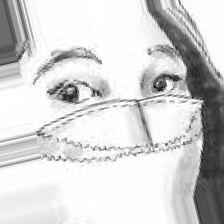

The person has the mask
----------------------------



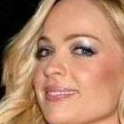

The person does not have mask
----------------------------



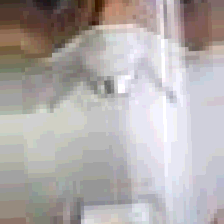

The person has the mask
----------------------------



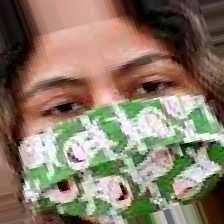

The person has the mask
----------------------------



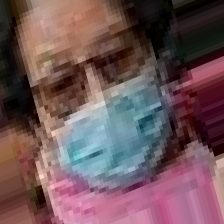

The person has the mask
----------------------------



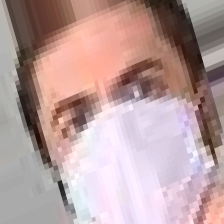

The person has the mask
----------------------------



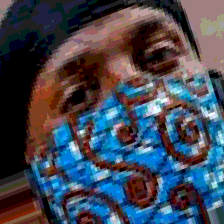

The person has the mask
----------------------------



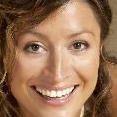

The person does not have mask
----------------------------



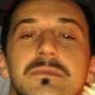

The person does not have mask
----------------------------



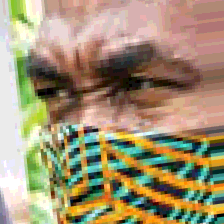

The person has the mask
----------------------------



In [176]:
from PIL import Image

index = 10
dir = root_dir + "Test/"
for _ in range(index):
    image = Image.open(dir + random.choice(images))
    input = transform(image).unsqueeze(0)
    output = model(input.to(device))
    probability = output.item()
    display(image)
    if probability < 0.5:
        print("The person has the mask\n----------------------------\n")

    else:
        print("The person does not have mask\n----------------------------\n")
